In [ ]:
from scipy.signal import csd, welch, chirp, correlate
import scipy.io.wavfile

import scipy.io.wavfile as wav
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.signal import csd, welch
from modem.chirp import START_CHIRP

In [45]:
FILENAME = "outputchirp (1).wav"
FS = 44100
CHIRP_DURATION = 1.0
WAIT_DURATION = 5.0

In [63]:
CHIRP_DURATION = 1.0
t = np.linspace(0, CHIRP_DURATION, int(CHIRP_DURATION * FS), endpoint=False)
x = chirp(t, f0=500, f1=4000, t1=CHIRP_DURATION, method='linear')
x = 0.9 * x / np.max(np.abs(x))  # Normalize and amplify
X2 = chirp(t, f0=4000, f1=500, t1=CHIRP_DURATION, method='quadratic')
X2 = 0.9 * X2 / np.max(np.abs(X2))  # Normalize and amplify

# Generate silence
silence = np.zeros(int(WAIT_DURATION * FS))

# Combine the two chirps with silence in between
combined_signal = np.concatenate((x, silence, X2))

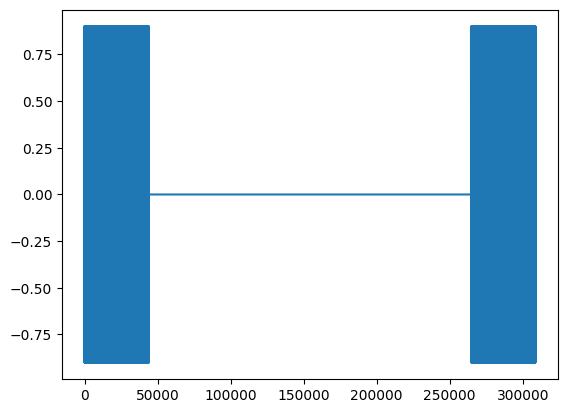

In [64]:
plt.plot(combined_signal)

In [65]:
_, y = scipy.io.wavfile.read(r"C:\Users\idoba\Downloads\outputchirp (1).wav")
y_scaled = y/np.max(np.abs(y))
y_combined = np.mean(y, axis=1)
y_combined_scaled = y_combined/np.max(np.abs(y_combined))



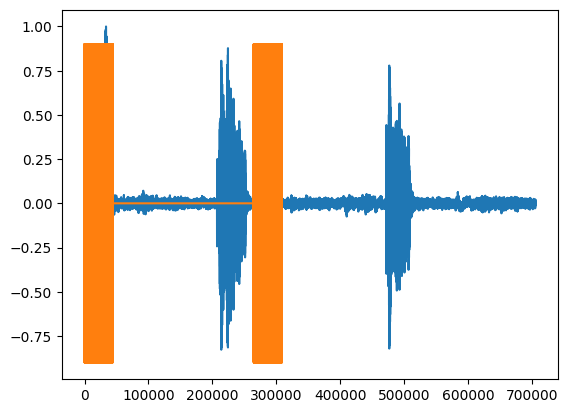

In [66]:
plt.plot(y_combined_scaled)
plt.plot(combined_signal)

In [67]:
cross = correlate(combined_signal, y_combined_scaled)

In [68]:
print(x.shape, y.shape, cross.shape)

(44100,) (705600, 2) (1014299,)


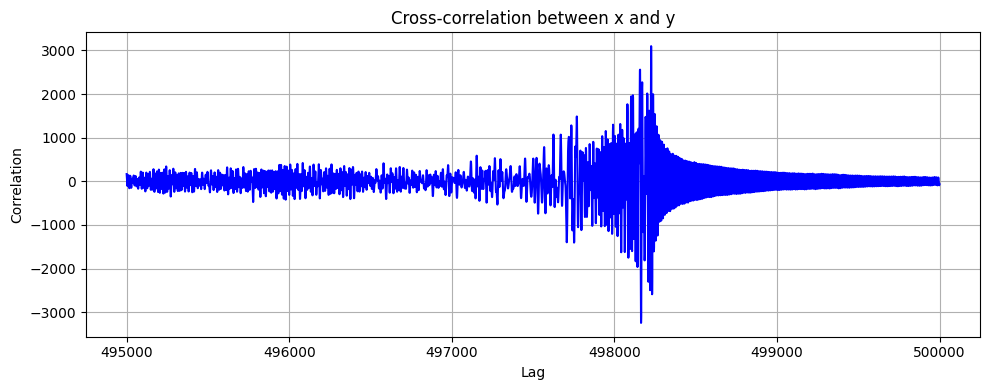

In [69]:
import matplotlib.patches as patches

plt.figure(figsize=(10, 4))
zoom1 = 0.495 * 1e6
zoom2 = 0.5 *1e6
plt.plot(np.arange(zoom1, zoom2), cross[int(zoom1):int(zoom2)], label="Cross-correlation", color='blue')
  # Get the current axis
#ellipse1 = patches.Ellipse((151776, -259.19540843), width=10000, height=20, color='red', fill=False, linewidth=2, label="Ellipse around (152000, 259)")
#ellipse2 = patches.Ellipse((160959, 189.05162877), width=10000, height=20, color='red', fill=False, linewidth=2, label="Ellipse around (160000, 189)")
#ax.add_patch(ellipse1)
#ax.add_patch(ellipse2)

plt.title("Cross-correlation between x and y")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
peaks,props = scipy.signal.find_peaks(np.abs(cross), height=3000, distance=200)

peak_heights = props["peak_heights"]
print(peaks, peak_heights)

[498164] [3244.78696135]


In [81]:
max_cross = max(cross)
max_abs_cross2 = peak_heights[0]
max_abs_index2 = peaks[0]
#max_abs_cross1 = peak_heights[1]
#max_abs_index1 = peaks[1]
#print(f"Value of correlation for chirp simulation: {max_abs_cross1} at index {max_abs_index1}")
print(f"Value of correlation for impulse simulationn: {max_abs_cross2} at index {max_abs_index2}")

Value of correlation for impulse simulationn: 3244.7869613489597 at index 498164


In [72]:
shift = max_abs_index2
#shift1 = max_abs_index1

x_shifted2 = np.pad(combined_signal, (shift, 0), "constant", constant_values=0)
x_shifted2 = np.pad(x_shifted2, (0, y.size - x_shifted2.size), "constant", constant_values=0)
#x_shifted1 = np.pad(combined_signal, (shift1, 0), "constant", constant_values=0)
#x_shifted1 = np.pad(x_shifted1, (0, y.size - x_shifted1.size), "constant", constant_values=0)

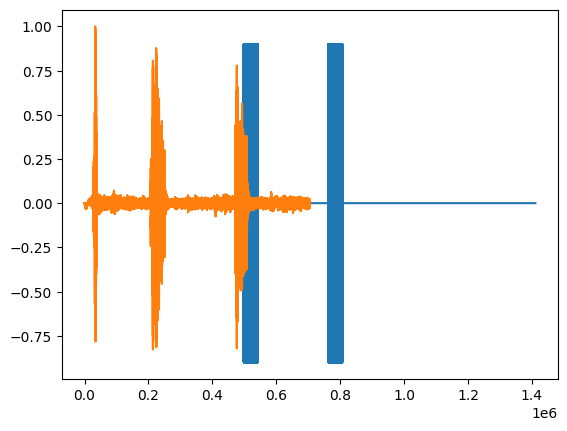

In [73]:
plt.plot(x_shifted2)
plt.plot(y_combined_scaled)

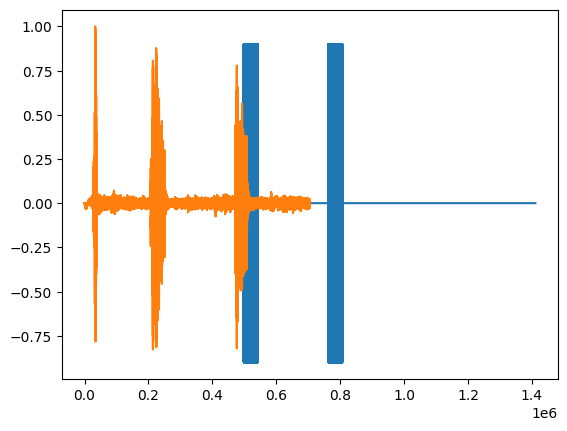

In [74]:
plt.plot(x_shifted2)
plt.plot(y_combined_scaled)

In [75]:
x_new2 = np.pad(combined_signal, (max_abs_index2, 0), "constant", constant_values=0)
x_new2 = np.pad(x_new2, (0, y.size - x_new2.size), "constant", constant_values=0)

#x_new1 = np.pad(x, (max_abs_index1, 0), "constant", constant_values=0)
#x_new1 = np.pad(x_new1, (0, y.size - x_new1.size), "constant", constant_values=0)

In [76]:
nonzero_indices = np.flatnonzero(x_shifted2)
first_nonzero_index = np.flatnonzero(x_shifted2)[0]
print("First nonzero index in x_shifted:", first_nonzero_index)
last_nonzero_index = nonzero_indices[-1]
print("Last nonzero index in x_shifted:", last_nonzero_index)

#nonzero_indices1 = np.flatnonzero(x_shifted1)
#first_nonzero_index1 = np.flatnonzero(x_shifted1)[0]
#print("First nonzero index in x_shifted:", first_nonzero_index1)
#last_nonzero_index1 = nonzero_indices1[-1]
#print("Last nonzero index in x_shifted:", last_nonzero_index1)


First nonzero index in x_shifted: 498164
Last nonzero index in x_shifted: 806863


In [77]:
x_cropped = x_new2[first_nonzero_index:last_nonzero_index]
y_cropped = y_combined_scaled[first_nonzero_index:last_nonzero_index]
#x_cropped1 = x_new1[first_nonzero_index1:last_nonzero_index1]
#y_cropped1 = y[first_nonzero_index1:last_nonzero_index1]
print(x_cropped.shape)
print(y_cropped.shape)
#print(x_cropped1.shape)
#print(y_cropped1.shape)

(308699,)
(207436,)


In [78]:
samplerate = FS
X_freq = np.fft.fft(x_cropped)
Y_freq = np.fft.fft(y_cropped)
freqs = np.fft.fftfreq(len(x_cropped), d=1/samplerate)
H_est1 =Y_freq/X_freq

#X_freq1 = np.fft.fft(x_cropped1)
#Y_freq1 = np.fft.fft(y_cropped1)
#freqs1 = np.fft.fftfreq(len(x_cropped1), d=1/samplerate)
#H_est2 =Y_freq1/X_freq1

# Assuming you've already calculated:
# H_est1 = Y_freq / X_freq
# freqs = np.fft.fftfreq(len(x_cropped), d=1/samplerate)

# Compute magnitude
#H_mag1 = np.abs(H_est2)
H_mag = np.abs(H_est1)

# Create a mask for the desired frequency range
mask = (freqs >= 500) & (freqs <= 4000)
noise_before = y[:first_nonzero_index]
noise_after = y[last_nonzero_index+10000:]
noise_region = np.concatenate([noise_before, noise_after])
noise_power = np.mean(noise_region**2)

snr_db = 10 * np.log10(np.mean((x_cropped)**2) / noise_power)
print("SNR (dB):", snr_db)

plt.figure(figsize=(10, 4))
#plt.semilogy(freqs[mask], H_mag1[mask], label="|H(f)|, shift=240000 (random point)")
plt.semilogy(freqs[mask], H_mag[mask], label="|H(f)|, shift=151776 (impulse peak)")
#plt.axvline(x=650, ymin=0, ymax=0.7, color='red', linestyle='--')  # Below 10^-2
#plt.axvline(x=650, ymin=0.82, ymax=1, color='red', linestyle='--',label = '650Hz')  # Above 7 * 10^-2
plt.title("Estimated Channel Frequency Response |H(f)| (500–4000 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (log scale)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (207436,) (308699,) 

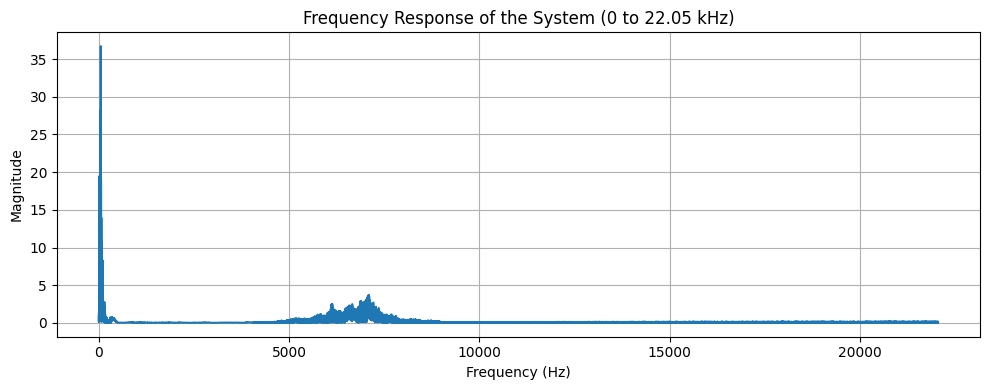

In [ ]:
# Compute the FFT frequencies
freqs = np.fft.fftfreq(len(x_cropped), d=1/samplerate)

# Only keep the positive frequencies (0 to Nyquist)
positive_freqs = freqs[:len(freqs)//2]
H_est1_positive = np.abs(H_est1[:len(freqs)//2])

# Plot the frequency response
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, H_est1_positive)
plt.title("Frequency Response of the System (0 to 22.05 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

SNR (dB): 56.941568863858876


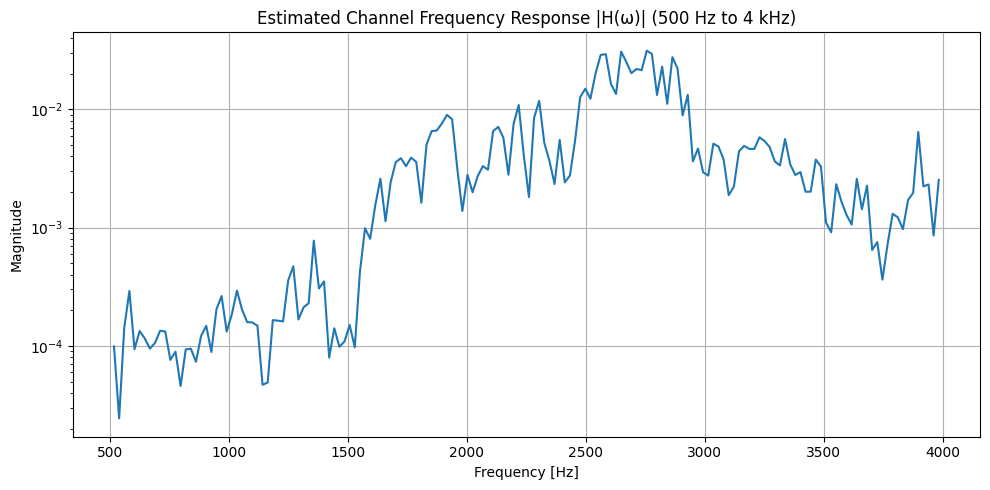

In [ ]:
duration = 3# seconds
samplerate = 44100  # Hz
nperseg = 2048  # for spectral estimation
signal_length = 441000
# Generate pseudo-random signal (white Gaussian noise)
t_plot = np.linspace(0, duration, signal_length, endpoint=False)

# Compute cross-spectral and power spectral densities
f, Sxy = csd(y_cropped, x_cropped, fs=samplerate, nperseg=nperseg)
_, Sxx = welch(x_cropped, fs=samplerate, nperseg=nperseg)

# Estimate channel transfer function H(w)
H_est = Sxy / (Sxx)
# Define noise regions (before and after the chirp)
noise_before = y[:first_nonzero_index]
noise_after = y[last_nonzero_index+10000:]
noise_region = np.concatenate([noise_before, noise_after])

# Calculate noise power
noise_power = np.mean(noise_region**2)

snr_db = 10 * np.log10(np.mean((x_cropped)**2) / noise_power)
print("SNR (dB):", snr_db)
min_freq = 500
max_freq = 4000
mask = (f >= min_freq) & (f <= max_freq)

plt.figure(figsize=(10, 5))
plt.semilogy(f[mask], np.abs(H_est)[mask])
plt.title("Estimated Channel Frequency Response |H(ω)| (500 Hz to 4 kHz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()